In [1]:
import numpy as np
from astropy.io import fits
from astropy.table import Table as Table
import matplotlib.pyplot as plt
from linetools.spectra import utils as ltsu
from linetools.spectra.xspectrum1d import XSpectrum1D
import astropy.units as u
from astropy import constants as const

# Read in


In [19]:
#SB = fits.open("/home/jsm/PycharmProjects/tau_eff/SB99/Fitting/old/sample_spec.fits") 

# to make sure I have the same fits format as this example spectrum

stack = fits.open("/Users/jsmonzon/IGM-UCSC/fits/composites/stack_3.fits")

#flux, sig, wave

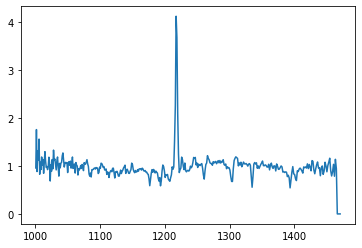

In [20]:
plt.plot(stack[1].data["wavelength"], stack[1].data["flux"] )
plt.show()

In [3]:
plt.plot(stack[2].data,stack[0].data)
plt.plot(stack[2].data,stack[1].data)
plt.show()

IndexError: list index out of range

In [18]:
mask = [1000 < i < 1500 for i in stack[2].data] # only the data I want 1000-1500A

flux = stack[0].data[mask]

sig = stack[1].data[mask]

wave = stack[2].data[mask]

# Fits creation

In [25]:
c_wave = fits.Column(name='WAVELENGTH', array=wave, unit="angstroms", format="E") 

c_flux = fits.Column(name='FLUX', array=flux, unit="relative flux", format="E")

c_noise = fits.Column(name='NOISE', array=sig, unit="relative flux", format="E")

t = fits.BinTableHDU.from_columns([c_wave, c_flux, c_noise])

hdr = t.header

hdr.set("REDSHIFT", 2.484)

# Write out

In [28]:
#hdul = fits.HDUList([prim_hdu,t_2, t_3])

t.writeto("/home/jsm/PycharmProjects/tau_eff/SB99/Fitting/data/composite_75.fits")